### Region-Based Image Detection with OpenCV (Selective Search)

Region-based image detection aims to identify specific areas (regions) in an image that might contain objects of interest. One popular method for generating these region proposals is **Selective Search**, which groups pixels into hierarchical segments based on color, texture, size, and shape compatibility, and then merges these segments to form potential object locations.

This example will demonstrate how to use OpenCV's built-in Selective Search algorithm to generate region proposals on an image.

In [1]:
# Install OpenCV contrib if not already installed, as Selective Search is part of it.
# This might take a moment.
!pip install opencv-contrib-python-headless

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.6/66.6 MB 8.9 MB/s eta 0:00:00


Could not find 'your_image.jpg'. Creating a dummy image for demonstration.
Image shape: (300, 500, 3)


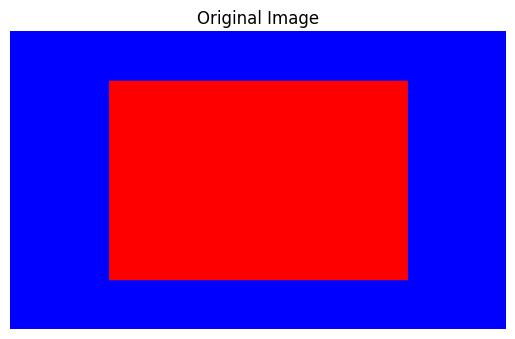

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# --- Image Loading ---
# You can upload an image to your Colab environment or use a URL.
# For demonstration, let's create a dummy image or use a common one if available.
# Replace 'your_image.jpg' with the path to your image.
# If you don't have an image, you can download one, e.g., from a URL:
# import requests
# from io import BytesIO
# from PIL import Image

# image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Car_with_red_sunset_background.jpg/640px-Car_with_red_sunset_background.jpg'
# response = requests.get(image_url)
# img_array = np.array(Image.open(BytesIO(response.content)))
# image = cv2.cvtColor(img_array, cv2.COLOR_RGB2BGR)

# For simplicity, let's create a dummy image if no file is provided
# In a real scenario, you would load your image.
try:
    image = cv2.imread('your_image.jpg') # Replace with your image path
    if image is None:
        raise FileNotFoundError("Image not found. Using a dummy image instead.")
except FileNotFoundError:
    print("Could not find 'your_image.jpg'. Creating a dummy image for demonstration.")
    # Create a simple dummy image (e.g., with a red square on a blue background)
    image = np.zeros((300, 500, 3), dtype=np.uint8)
    image[:, :, 0] = 255 # Blue background
    cv2.rectangle(image, (100, 50), (400, 250), (0, 0, 255), -1) # Red rectangle

print(f"Image shape: {image.shape}")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')
plt.show()


In [3]:
# Initialize Selective Search Segmentation
# There are two main modes: 'fast' and 'quality'
# 'fast' is quicker but might miss some regions.
# 'quality' is slower but generally provides more comprehensive proposals.

ss = cv2.ximgproc.segmentation.createSelectiveSearchSegmentation()
ss.setBaseImage(image)

# Set strategy: 'f' for fast, 'q' for quality, 's' for single (combines multiple strategies)
ss.switchToSelectiveSearchFast()
# ss.switchToSelectiveSearchQuality() # Uncomment for higher quality but slower execution

print("Performing Selective Search to generate region proposals...")
rects = ss.process()

print(f"Total number of region proposals: {len(rects)}")


Performing Selective Search to generate region proposals...
Total number of region proposals: 100


Displaying the top 200 region proposals.


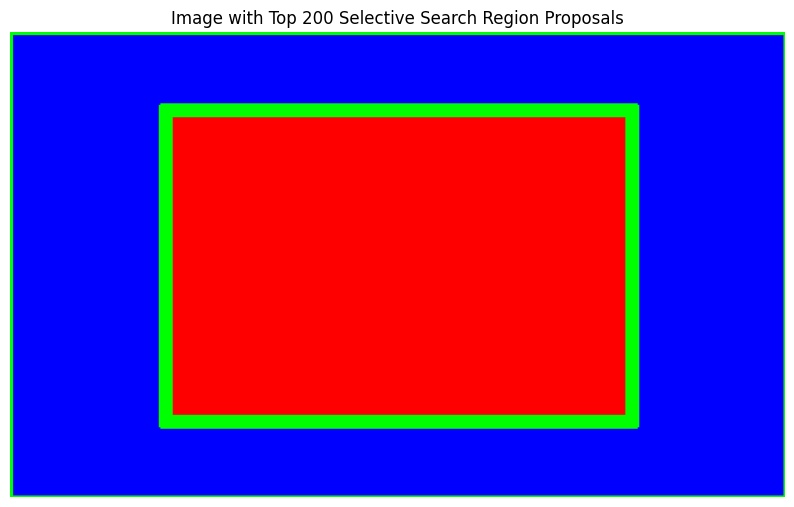

Each green rectangle represents a proposed region that might contain an object.
In a full object detection pipeline, these regions would then be fed into a classifier.


In [4]:
# --- Visualize the top N region proposals ---

# Make a copy of the original image to draw rectangles on
output_image = image.copy()

# Define how many top regions to display
num_top_regions = 200 # Adjust this number to see more or fewer proposals

print(f"Displaying the top {num_top_regions} region proposals.")

# Loop over the region proposals and draw them
for i, (x, y, w, h) in enumerate(rects):
    if i < num_top_regions:
        # Draw rectangle (color, thickness)
        cv2.rectangle(output_image, (x, y), (x+w, y+h), (0, 255, 0), 2) # Green rectangles
    else:
        break

# Display the image with bounding boxes
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title(f"Image with Top {num_top_regions} Selective Search Region Proposals")
plt.axis('off')
plt.show()

print("Each green rectangle represents a proposed region that might contain an object.")
print("In a full object detection pipeline, these regions would then be fed into a classifier.")